> 20 points, 1 hour

`63070501061 S.RAKNA`

# RANSAC Regression
Use RANSAC to find $a$, $b$, $c$ for the following dataset where points $(x_i, y_i)$ are discrete samples from a function $f(x) = ax^2 + bx + c$ with 2 outliers. 

- Hint: You should get $a$, $b$, and $c$ close to 2.2, 0.5, -4.5, respectively.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import RANSACRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

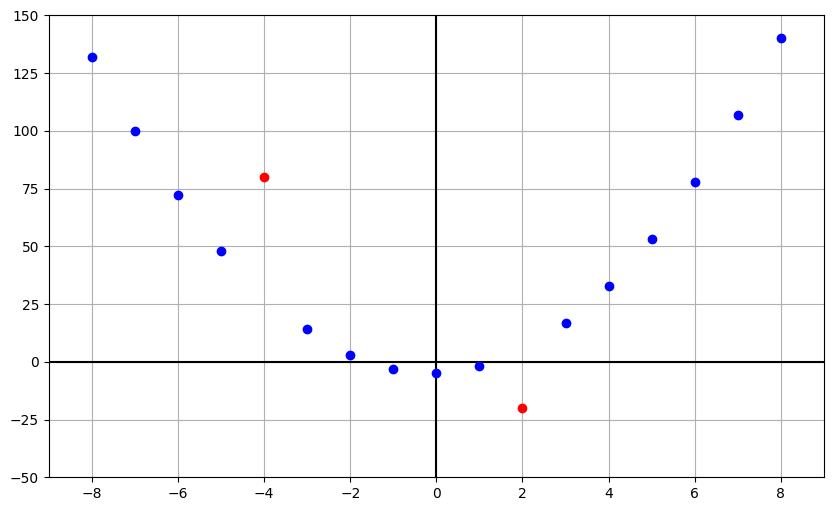

In [3]:
# Discrete sample points
data = np.array([
    Point(-8, 132),
    Point(-7, 100),
    Point(-6, 72),
    Point(-5, 48),
    Point(-4, 80),  # outlier
    Point(-3, 14),
    Point(-2, 3),
    Point(-1, -3),
    Point(0, -5),
    Point(1, -2),
    Point(2, -20),  # outlier
    Point(3, 17),
    Point(4, 33),
    Point(5, 53),
    Point(6, 78),
    Point(7, 107),
    Point(8, 140)
])

# Plot the data
# show axis, grid, and light-blue dots
plt.figure(figsize=(10, 6))
plt.axis([-9, 9, -50, 150])
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
# normal points: blue
# outliers: red
for point in data:
    if point.x == -4 or point.x == 2:
        plt.plot(point.x, point.y, 'ro')
    else:
        plt.plot(point.x, point.y, 'bo')


In [4]:
# RANSAC

# Convert data to numpy array
X = np.array([point.x for point in data]).reshape(-1, 1)
y = np.array([point.y for point in data]).reshape(-1, 1)

In [5]:
class PolynomialRegression:
    def __init__(self, degree):
        self.degree = degree

    def fit(self, X, y):
        self.coef_ = np.polyfit(X[:, 0], y[:, 0], self.degree)

    def predict(self, X):
        y_pred = np.zeros((X.shape[0], 1))
        for i in range(self.degree + 1):
            y_pred += self.coef_[i] * X ** (self.degree - i)
        return y_pred

    def score(self, X, y):
        y_pred = self.predict(X)
        return r2_score(y, y_pred)

    def get_params(self, deep=True):
        return {'degree': self.degree}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self


In [6]:
def number_of_samples(p: float, e: float, s: int) -> int:
    """
    Calculate the number of samples needed to achieve a certain probability
    of success.
    :param p: probability of success
    :param e: acceptable error
    :param s: number of samples in a single trial
    :return: number of samples needed to achieve a certain probability
    of success
    """
    return int(np.log(1 - p) / np.log(1 - (1 - e) ** s))

In [7]:
# RANSAC regression for ax^2 + bx + c
ransac = RANSACRegressor(
    base_estimator=PolynomialRegression(degree=2),
    min_samples=number_of_samples(p=0.99, e=0.25, s=4),
    max_trials=100,
    residual_threshold=10,
)

In [8]:
ransac.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ransac.py:343: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.1 and will be removed in 1.3.
  warnings.warn(


RANSACRegressor(base_estimator=<__main__.PolynomialRegression object at 0x1473cf6d0>,
                estimator=<__main__.PolynomialRegression object at 0x1473cf6d0>,
                min_samples=12, residual_threshold=10)

In [9]:
# Result
print('Coefficients: \n', ransac.estimator_.coef_)
print('Mean squared error: %.2f'
      % mean_squared_error(y, ransac.predict(X)))
print('Coefficient of determination: %.2f'  
      % r2_score(y, ransac.predict(X)))

Coefficients: 
 [ 2.20168149  0.50465825 -4.55078223]
Mean squared error: 192.67
Coefficient of determination: 0.92


In [10]:
# Inliers and outliers
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Predict data of estimated models and print the result
line_X = np.arange(-9, 9, 0.1).reshape(-1, 1)
line_y_ransac = ransac.predict(line_X)

# Print the result
print(f"Predicted y: {line_y_ransac}")

Predicted y: [[ 1.69243494e+02]
 [ 1.65352950e+02]
 [ 1.61506440e+02]
 [ 1.57703963e+02]
 [ 1.53945520e+02]
 [ 1.50231110e+02]
 [ 1.46560734e+02]
 [ 1.42934392e+02]
 [ 1.39352083e+02]
 [ 1.35813808e+02]
 [ 1.32319567e+02]
 [ 1.28869359e+02]
 [ 1.25463185e+02]
 [ 1.22101045e+02]
 [ 1.18782938e+02]
 [ 1.15508865e+02]
 [ 1.12278825e+02]
 [ 1.09092819e+02]
 [ 1.05950847e+02]
 [ 1.02852908e+02]
 [ 9.97990029e+01]
 [ 9.67891314e+01]
 [ 9.38232936e+01]
 [ 9.09014894e+01]
 [ 8.80237189e+01]
 [ 8.51899820e+01]
 [ 8.24002787e+01]
 [ 7.96546090e+01]
 [ 7.69529730e+01]
 [ 7.42953706e+01]
 [ 7.16818018e+01]
 [ 6.91122667e+01]
 [ 6.65867651e+01]
 [ 6.41052973e+01]
 [ 6.16678630e+01]
 [ 5.92744624e+01]
 [ 5.69250954e+01]
 [ 5.46197620e+01]
 [ 5.23584623e+01]
 [ 5.01411962e+01]
 [ 4.79679637e+01]
 [ 4.58387648e+01]
 [ 4.37535996e+01]
 [ 4.17124680e+01]
 [ 3.97153701e+01]
 [ 3.77623058e+01]
 [ 3.58532751e+01]
 [ 3.39882780e+01]
 [ 3.21673145e+01]
 [ 3.03903847e+01]
 [ 2.86574886e+01]
 [ 2.69686260e+01]

In [11]:
a, b, c = ransac.estimator_.coef_[0], \
    ransac.estimator_.coef_[1], \
    ransac.estimator_.coef_[2]

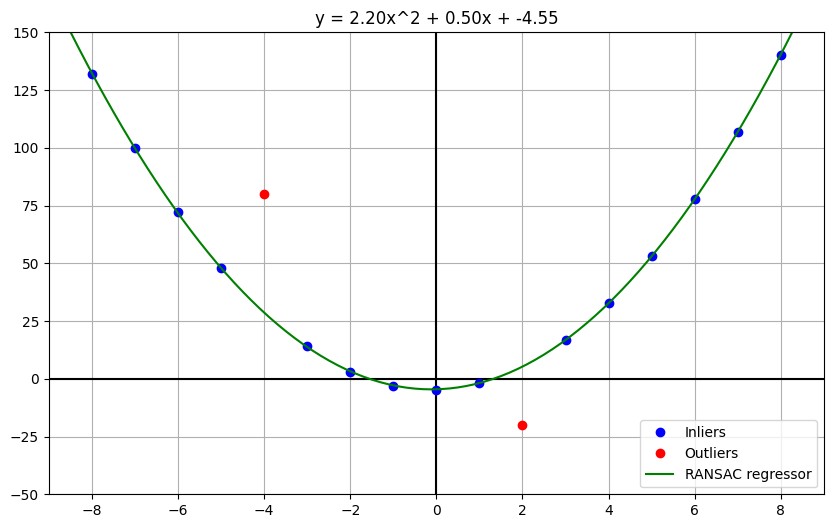

In [12]:
plt.figure(figsize=(10, 6))
plt.axis([-9, 9, -50, 150])
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X[inlier_mask], y[inlier_mask], 'bo', label='Inliers')
plt.plot(X[outlier_mask], y[outlier_mask], 'ro', label='Outliers')
plt.plot(line_X, line_y_ransac, 'g-', label='RANSAC regressor')
plt.legend(loc='lower right')
plt.title(f"y = {a:.2f}x^2 + {b:.2f}x + {c:.2f}")
plt.show()


In [13]:
# Summary
# Coefficients:
print(f"Estimated coefficients: a, b, c = {a:.2f}, {b:.2f}, {c:.2f}")
# Coefficient of determination:
print(f"Coefficient of determination: {r2_score(y, ransac.predict(X)):.2f}")

Estimated coefficients: a, b, c = 2.20, 0.50, -4.55
Coefficient of determination: 0.92
